In [66]:
# Importamos las librerias a utilizar
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd  

import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import seaborn as sns
import statsmodels.api as sm

from imblearn.under_sampling import RandomUnderSampler

from sklearn import metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

import missingno as msno

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import os

In [67]:
# Cargamos el archivo con el conjunto de datos respectivo
ATL = pd.read_csv('https://raw.githubusercontent.com/MadavR/NBAShots/main/NBA_ATL_Lanzamientos_V3.txt')
ATL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6762 entries, 0 to 6761
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   team                   6762 non-null   object 
 1   self_previous_shot     6762 non-null   object 
 2   player_position        6762 non-null   object 
 3   home_game              6762 non-null   object 
 4   location_x             6762 non-null   int64  
 5   points                 6762 non-null   int64  
 6   location_y             6762 non-null   int64  
 7   shoot_player           6762 non-null   object 
 8   time_from_last_shot    6762 non-null   int64  
 9   quarter                6762 non-null   int64  
 10  current_shot_outcome   6762 non-null   object 
 11  home_team_name         6762 non-null   object 
 12  away_team_name         6762 non-null   object 
 13  player_position_name   6762 non-null   object 
 14  shot_type_es           6762 non-null   object 
 15  week

In [68]:
# Declaración de las columnas numéricas
num_cols = ATL.select_dtypes(exclude='object').columns

# Declaración de las columnas categóricas
cat_cols = ATL.select_dtypes(include='object').columns

In [69]:
ATL['resultado'] = 0 # Creamos la variable y le asignamos 0 a todos los registros
ATL.loc[ATL['current_shot_outcome'] == 'Anotado', 'resultado'] = 1 # Ajustamos los registros 'Anotado' con un 'resultado' de 1

In [70]:
ATL['self_previous_shot'].value_counts()

Fallido      3295
Anotado      3051
Bloqueado     416
Name: self_previous_shot, dtype: int64

In [71]:
ATL['resultado_previo'] = 0 # Creamos la variable y le asignamos 0 a todos los registros
ATL.loc[ATL['self_previous_shot'] == 'Anotado', 'resultado_previo'] = 1 # Ajustamos los registros 'SCORED' con un 'resultado' de 1

In [72]:
ATL['player_position'].value_counts()

PF    1464
PG    1244
SF    1214
SG    1144
C      932
G      383
F      381
Name: player_position, dtype: int64

In [73]:
ATL['posicion_jugador'] = 0 # Creamos la variable y le asignamos 0 a todos los registros
ATL.loc[ATL['player_position'] == 'PF', 'posicion_jugador'] = 1 # Ajustamos los registros 'PF' con un 'resultado' de 1
ATL.loc[ATL['player_position'] == 'PG', 'posicion_jugador'] = 2 # Ajustamos los registros 'PG' con un 'resultado' de 2
ATL.loc[ATL['player_position'] == 'SF', 'posicion_jugador'] = 3 # Ajustamos los registros 'SF' con un 'resultado' de 3
ATL.loc[ATL['player_position'] == 'SG', 'posicion_jugador'] = 4 # Ajustamos los registros 'SG' con un 'resultado' de 4
ATL.loc[ATL['player_position'] == 'C', 'posicion_jugador'] = 5 # Ajustamos los registros 'C' con un 'resultado' de 5
ATL.loc[ATL['player_position'] == 'F', 'posicion_jugador'] = 6 # Ajustamos los registros 'F' con un 'resultado' de 6
ATL.loc[ATL['player_position'] == 'G', 'posicion_jugador'] = 7 # Ajustamos los registros 'G' con un 'resultado' de 7

In [74]:
ATL['posicion_jugador'].value_counts()

1    1464
2    1244
3    1214
4    1144
5     932
7     383
6     381
Name: posicion_jugador, dtype: int64

In [75]:
ATL['shoot_player'].value_counts()

Dennis Schroder     1181
Paul Millsap         940
Tim Hardaway Jr.     893
Kent Bazemore        695
Dwight Howard        597
Thabo Sefolosha      389
Malcolm Delaney      383
Mike Muscala         334
Taurean Prince       283
Kyle Korver          236
Ersan Ilyasova       224
Kris Humphries       214
Mike Dunleavy        130
DeAndre Bembry        98
Mike Scott            58
Jose Calderon         56
Ryan Kelly            28
Lamar Patterson       15
Gary Neal              7
Walter Tavares         1
Name: shoot_player, dtype: int64

In [76]:
ATL['lanzador'] = 0 # Creamos la variable y le asignamos 0 a todos los registros
ATL.loc[ATL['shoot_player'] == 'Dennis Schroder', 'lanzador'] = 1 # Ajustamos los registros 'Dennis Schroder' con un 'resultado' de 1
ATL.loc[ATL['shoot_player'] == 'Paul Millsap', 'lanzador'] = 2 # Ajustamos los registros 'Paul Millsap' con un 'resultado' de 2
ATL.loc[ATL['shoot_player'] == 'Tim Hardaway Jr.', 'lanzador'] = 3 # Ajustamos los registros 'Tim Hardaway Jr.' con un 'resultado' de 3
ATL.loc[ATL['shoot_player'] == 'Kent Bazemore', 'lanzador'] = 4 # Ajustamos los registros 'Kent Bazemore' con un 'resultado' de 4
ATL.loc[ATL['shoot_player'] == 'Dwight Howard', 'lanzador'] = 5 # Ajustamos los registros 'Dwight Howard' con un 'resultado' de 5
ATL.loc[ATL['shoot_player'] == 'Thabo Sefolosha', 'lanzador'] = 6 # Ajustamos los registros 'Thabo Sefolosha' con un 'resultado' de 6
ATL.loc[ATL['shoot_player'] == 'Malcolm Delaney', 'lanzador'] = 7 # Ajustamos los registros 'Malcolm Delaney' con un 'resultado' de 7
ATL.loc[ATL['shoot_player'] == 'Mike Muscala', 'lanzador'] = 8 # Ajustamos los registros 'Mike Muscala' con un 'resultado' de 8
ATL.loc[ATL['shoot_player'] == 'Taurean Prince', 'lanzador'] = 9 # Ajustamos los registros 'Taurean Prince' con un 'resultado' de 9
ATL.loc[ATL['shoot_player'] == 'Kyle Korver', 'lanzador'] = 10 # Ajustamos los registros 'Kyle Korver' con un 'resultado' de 10
ATL.loc[ATL['shoot_player'] == 'Ersan Ilyasova', 'lanzador'] = 11 # Ajustamos los registros 'Ersan Ilyasova' con un 'resultado' de 11
ATL.loc[ATL['shoot_player'] == 'Kris Humphries', 'lanzador'] = 12 # Ajustamos los registros 'Kris Humphries' con un 'resultado' de 12
ATL.loc[ATL['shoot_player'] == 'Mike Dunleavy', 'lanzador'] = 13 # Ajustamos los registros 'Mike Dunleavy' con un 'resultado' de 13
ATL.loc[ATL['shoot_player'] == 'DeAndre Bembry', 'lanzador'] = 14 # Ajustamos los registros 'DeAndre Bembry' con un 'resultado' de 14
ATL.loc[ATL['shoot_player'] == 'Mike Scott', 'lanzador'] = 15 # Ajustamos los registros 'Mike Scott' con un 'resultado' de 15
ATL.loc[ATL['shoot_player'] == 'Jose Calderon', 'lanzador'] = 16 # Ajustamos los registros 'Jose Calderon' con un 'resultado' de 16
ATL.loc[ATL['shoot_player'] == 'Ryan Kelly', 'lanzador'] = 17 # Ajustamos los registros 'Ryan Kelly' con un 'resultado' de 17
ATL.loc[ATL['shoot_player'] == 'Lamar Patterson', 'lanzador'] = 18 # Ajustamos los registros 'Lamar Patterson' con un 'resultado' de 18
ATL.loc[ATL['shoot_player'] == 'Gary Neal', 'lanzador'] = 19 # Ajustamos los registros 'Gary Neal' con un 'resultado' de 19
ATL.loc[ATL['shoot_player'] == 'Walter Tavares', 'lanzador'] = 20 # Ajustamos los registros 'Walter Tavares' con un 'resultado' de 20

In [77]:
ATL['lanzador'].value_counts()

1     1181
2      940
3      893
4      695
5      597
6      389
7      383
8      334
9      283
10     236
11     224
12     214
13     130
14      98
15      58
16      56
17      28
18      15
19       7
20       1
Name: lanzador, dtype: int64

In [78]:
ATL['home_game'].value_counts()

Si    3397
No    3365
Name: home_game, dtype: int64

In [79]:
ATL['juego_local'] = 0 # Creamos la variable y le asignamos 0 a todos los registros
ATL.loc[ATL['home_game'] == 'Si', 'juego_local'] = 1 # Ajustamos los registros 'Si' con un 'resultado' de 1

In [80]:
variab_predic = ['resultado_previo', 'posicion_jugador', 'juego_local', 'location_x', 'points',
                 'location_y', 'lanzador', 'time_decimal', 'time_from_last_shot', 'quarter',
                 'game_id']
variab_predic

['resultado_previo',
 'posicion_jugador',
 'juego_local',
 'location_x',
 'points',
 'location_y',
 'lanzador',
 'time_decimal',
 'time_from_last_shot',
 'quarter',
 'game_id']

In [81]:
XTrain, XTest, yTrain, yTest = train_test_split(ATL[variab_predic], ATL['resultado'], test_size=0.33, random_state=0)

In [ ]:
mutual_inf = mutual_info_regression(XTrain, yTrain, discrete_features='auto', n_neighbors=20)
# Ajustamos el n_neighbors a 20 porque es el que produce 5 variables seleccionadas (la mayor cantidad).
mutual_inf

array([0.00310602, 0.00632778, 0.0043649 , 0.0420165 , 0.01521052,
       0.02788672, 0.00386242, 0.00088299, 0.00591691, 0.00411971,
       0.        ])

In [ ]:
threshold = 0.005
var_filtered = XTrain.columns[mutual_inf > threshold] 
var_filtered

Index(['posicion_jugador', 'location_x', 'points', 'location_y',
       'time_from_last_shot'],
      dtype='object')

Text(0.5, 0, 'Variables numéricas predictoras')

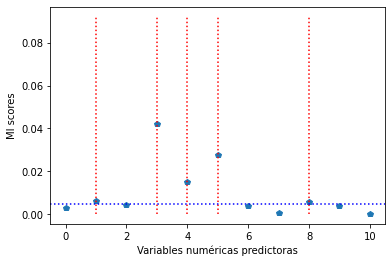

In [ ]:
plt.plot(mutual_inf,'p')
mutual_inf_indexes = np.where(mutual_inf > threshold)
plt.vlines(x=mutual_inf_indexes,ymin=0,ymax=np.max(mutual_inf)+0.05,ls=':',colors='r')
plt.axhline(y=threshold,ls=':',color='b')  #Threshold
plt.ylabel('MI scores')
plt.xlabel('Variables numéricas predictoras')

In [ ]:
estimator = RandomForestClassifier()
selector1 = RFE(estimator, n_features_to_select=6, step=1)
selector1 = selector1.fit(XTrain, yTrain)
selector1.support_
XTrain.columns[selector1.support_]

Index(['location_x', 'location_y', 'lanzador', 'time_decimal',
       'time_from_last_shot', 'game_id'],
      dtype='object')

Acá es donde cambiamos pues seleccionamos solamente las siguientes 8 variables:

- `posicion_jugador` (Por filtro)
- `points` (Por filtro)
- `location_x` (Por filtro y por envoltura)
- `location_y` (Por filtro y por envoltura)
- `lanzador` (Por envoltura)
- `time_from_last_shot` (Por filtro y por envoltura)
- `time_decimal` (Por envoltura)
- `game_id` (Por envoltura)

Se eliminarían las siguientes 3 variables:

- `quarter` lo cual es esperable porque en el AE no se notaron diferencias
- `resultado_previo` lo cual soporta la decisión de eliminar los registros nulos
- `juego_local` lo cual es esperable porque en el AE no se notaron diferencias


**Opción 1: Todas las 8 variables seleccionadas**

In [82]:
variab_selec = ['posicion_jugador', 'points', 'location_x', 'location_y',
                'lanzador', 'time_decimal', 'time_from_last_shot', 'game_id']

In [83]:
XTrain, XTest, yTrain, yTest = train_test_split(ATL[variab_selec], ATL['resultado'], test_size=0.33, random_state=0)

In [84]:
np.shape(XTrain),np.shape(XTest), np.shape(yTrain),np.shape(yTest) 

((4530, 8), (2232, 8), (4530,), (2232,))

In [ ]:
y_test = yTest.to_list()

def get_error(pred):
  error = 0  
  for i in range(0,len(yTest)):
    if(y_test[i]!=pred[i]):
      error+=1/len(y_test)

  return error

def show_confusion_matrix(pred, name):
    conf_matrix = confusion_matrix(yTest, pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(conf_matrix, annot=True, fmt='d');
    plt.title('Confusion matrix {}'.format(name))
    plt.ylabel('Resultado del lanzamiento')
    plt.xlabel('Predicción del lanzamiento')
    plt.show()

def show_measures(pred, predProb, name):
  accuracy = accuracy_score(y_true=y_test, y_pred=pred)
  precision = precision_score(y_true=y_test, y_pred=pred)

  fpr, tpr, thresholds = metrics.roc_curve(y_test, predProb[:, 1])
  AUC = metrics.auc(fpr, tpr)

  # Medidas
  measures_df = pd.DataFrame({
      'accuracy' : { 'measure':  accuracy},
      'precision' : { 'measure':  precision},
      'AUC' : { 'measure':  AUC},
  })

  display(measures_df)

  # mostrar ROC
  plt.title('Receiver Operating Characteristic - {}'.format(name))
  plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % AUC)
  plt.legend(loc = 'lower right')
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([-0.01, 1])
  plt.ylim([0, 1.05])
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.show()

  # Comparacion de medidas
  fig = plt.figure()
  ax = fig.add_axes([0,0,1,1])
  ax.set_title('Comparación de métricas - {}'.format(name))
  ejeX = ['Accuracy', 'Precision','AUC']
  ejeY = [accuracy, precision, AUC]
  ax.bar(ejeX, ejeY)
  def addlabels(x,y,plotP):
      for i in range(len(x)):
          plotP.text(i,y[i],y[i])
  addlabels(ejeX,ejeY,plt)
  plt.show()

def eval_model(model_fn, name):  
  clf = model_fn()
  clf.fit(XTrain, yTrain)

  predictions=clf.predict(XTest)
  predictionsProb=clf.predict_proba(XTest)

  error = get_error(predictions)
  print('El error de clasificación para {} en la muestra de test es:'.format(name), error)
  show_confusion_matrix(predictions, name)
  show_measures(predictions, predictionsProb, name)
  
  return error

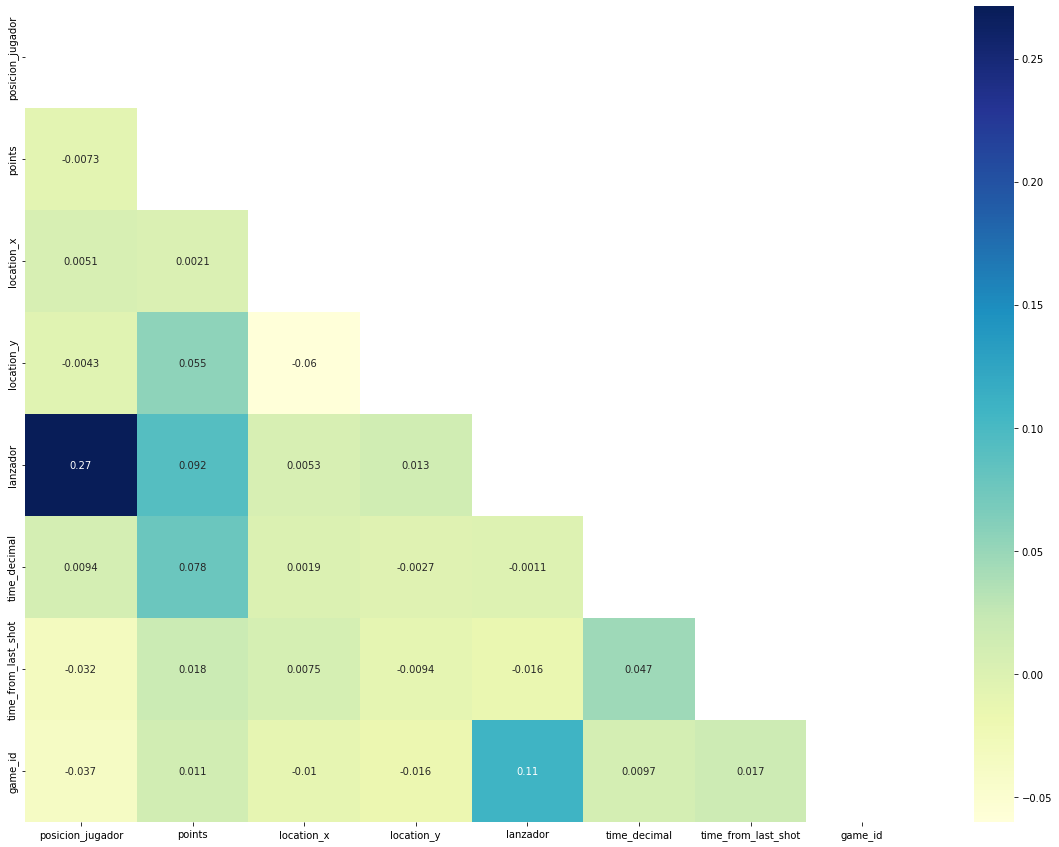

In [85]:
plt.figure(figsize = (20,15))
mask = np.triu(np.ones_like(ATL[variab_selec].corr()))
 
dataplot = sns.heatmap(ATL[variab_selec].corr(), cmap="YlGnBu", annot=True, mask=mask)
plt.show()

In [ ]:
#model_LDA = eval_model(LinearDiscriminantAnalysis, 'LDA')

In [ ]:
#model_QDA = eval_model(QuadraticDiscriminantAnalysis, 'QDA')

El error de clasificación para NBC en la muestra de test es: 0.4327956989247363


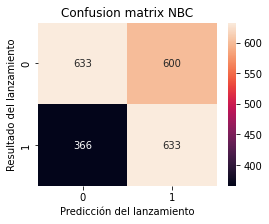

,accuracy,precision,AUC
measure,0.567204,0.513382,0.602239


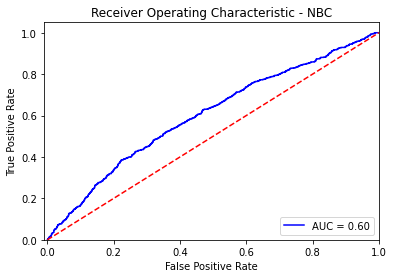

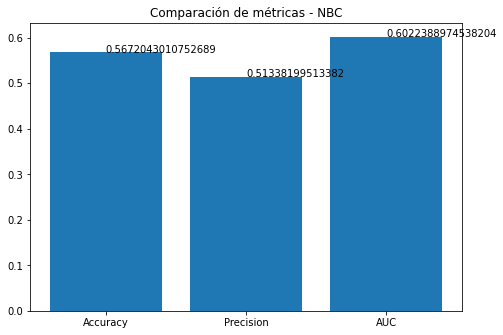

In [ ]:
model_NBC = eval_model(GaussianNB, 'NBC')

In [ ]:
#model_LR = eval_model(LogisticRegression, 'Regresión logística')

In [ ]:
#model_Tree = DecisionTreeClassifier()
#model_Tree.fit(XTrain, yTrain)

#fig, ax = plt.subplots(figsize=(30, 10), dpi=800)
#plot_tree(model_Tree, ax=ax, filled=True)
#plt.show()

In [ ]:
# Creamos una lista para agregar la métrica AUC de los modelos que se van a elaborar
Aucs = []

def show_roc(desc, clf, cols = variab_selec):
    prediccionesProb=clf.predict_proba(XTest[cols])

    fpr, tpr, thresholds = metrics.roc_curve(yTest, prediccionesProb[:,1], pos_label=1)
    AUC=metrics.auc(fpr, tpr)
    Aucs.append({ 'model': desc, 'auc': AUC })

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % AUC)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([-0.01, 1])
    plt.ylim([0, 1.05])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [ ]:
#show_roc('Árbol de decisión', model_Tree, variab_selec)

In [86]:
model_knn = KNeighborsClassifier(n_neighbors=65)
X_knn = XTrain
y_knn = yTrain
model_knn.fit(X_knn, y_knn)

KNeighborsClassifier(n_neighbors=65)

,accuracy,precision,AUC
measure,0.62052,0.600264,0.637067


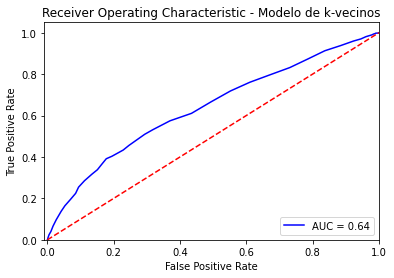

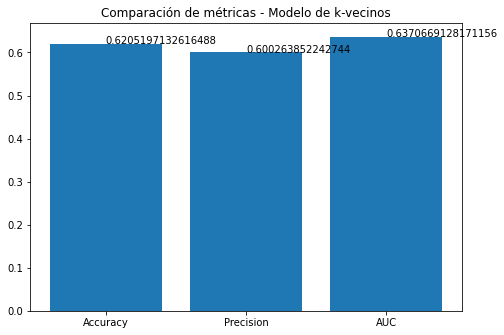

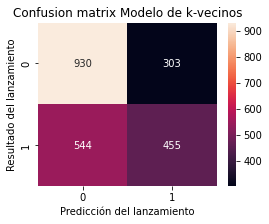

In [87]:
predicciones_knn = model_knn.predict(XTest)
prediccionesProb_knn = model_knn.predict_proba(XTest)
show_measures(predicciones_knn, prediccionesProb_knn, 'Modelo de k-vecinos')
show_confusion_matrix(predicciones_knn, 'Modelo de k-vecinos')

In [ ]:
model_RF = RandomForestClassifier(random_state=0)
model_RF.fit(XTrain, yTrain)

RandomForestClassifier(random_state=0)

,accuracy,precision,AUC
measure,0.599014,0.569333,0.616164


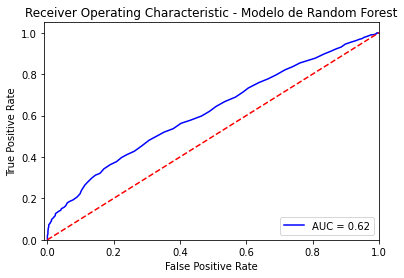

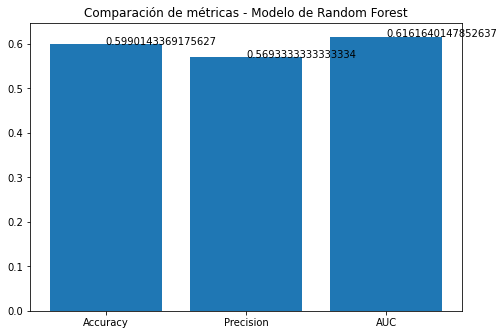

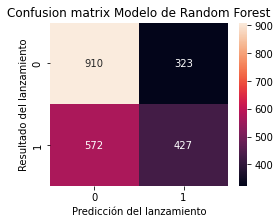

In [ ]:
predicciones_RF = model_RF.predict(XTest)
prediccionesProb_RF = model_RF.predict_proba(XTest)
show_measures(predicciones_RF, prediccionesProb_RF, 'Modelo de Random Forest')
show_confusion_matrix(predicciones_RF, 'Modelo de Random Forest')

In [ ]:
model_GB= GradientBoostingClassifier(learning_rate=0.1,max_depth=2,random_state=0)
model_GB.fit(XTrain, yTrain)

GradientBoostingClassifier(max_depth=2, random_state=0)

,accuracy,precision,AUC
measure,0.619176,0.621931,0.624433


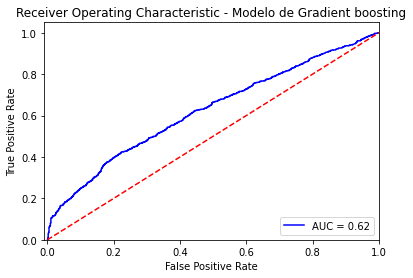

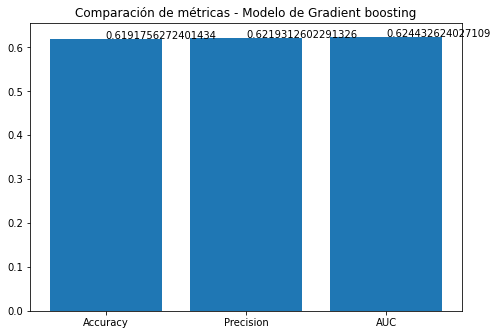

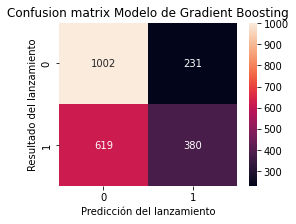

In [ ]:
predicciones_GB = model_GB.predict(XTest)
prediccionesProb_GB = model_GB.predict_proba(XTest)
show_measures(predicciones_GB, prediccionesProb_GB, 'Modelo de Gradient boosting')
show_confusion_matrix(predicciones_GB, 'Modelo de Gradient Boosting')

In [ ]:
#model_SVC_lin = SVC(kernel='linear', probability=True)
#model_SVC_lin.fit(XTrain, yTrain)

SVC(kernel='linear', probability=True)

In [ ]:
#model_SVC_quad = SVC(kernel='poly', probability=True, degree=4)
#model_SVC_quad.fit(XTrain, yTrain)

SVC(degree=4, kernel='poly', probability=True)

In [ ]:
model_SVC_rad = SVC(kernel='rbf', probability=True)
model_SVC_rad.fit(XTrain, yTrain)

SVC(probability=True)

,accuracy,precision,AUC
measure,0.570789,0.518222,0.625117


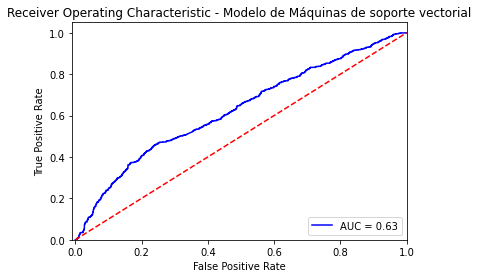

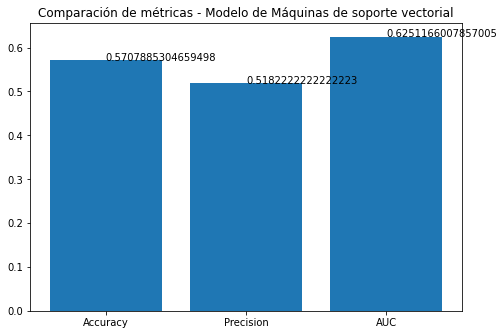

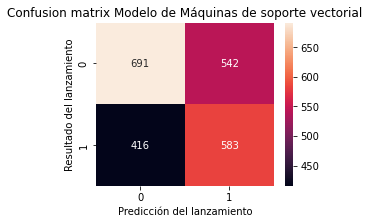

In [ ]:
predicciones_SVC_rad = model_SVC_rad.predict(XTest)
prediccionesProb_SVC_rad = model_SVC_rad.predict_proba(XTest)
show_measures(predicciones_SVC_rad, prediccionesProb_SVC_rad, 'Modelo de Máquinas de soporte vectorial')
show_confusion_matrix(predicciones_SVC_rad, 'Modelo de Máquinas de soporte vectorial')

In [ ]:
#model_Bag = BaggingClassifier(n_estimators=7, random_state=0)
#model_Bag.fit(XTrain, yTrain)

BaggingClassifier(n_estimators=7, random_state=0)

In [ ]:
model_neural = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(88, 44, 22), random_state=1,max_iter=5000)
model_neural.fit(XTrain, yTrain)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(88, 44, 22), max_iter=5000,
              random_state=1)

,accuracy,precision,AUC
measure,0.583781,0.538631,0.608954


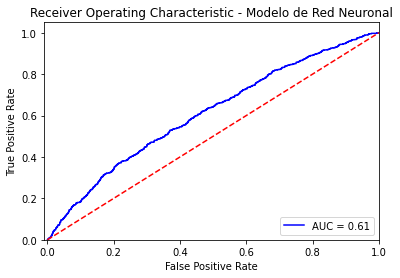

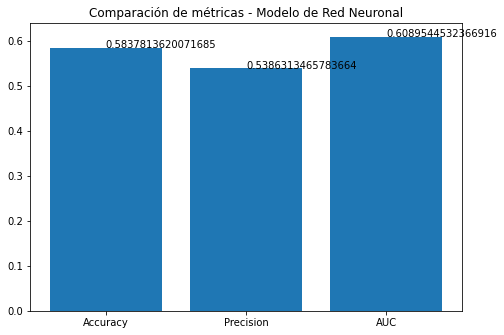

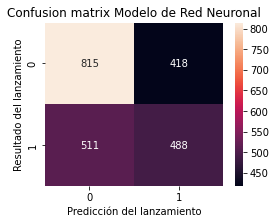

In [ ]:
predicciones_neural = model_neural.predict(XTest)
prediccionesProb_neural = model_neural.predict_proba(XTest)
show_measures(predicciones_neural, prediccionesProb_neural, 'Modelo de Red Neuronal')
show_confusion_matrix(predicciones_neural, 'Modelo de Red Neuronal')

In [ ]:
# Definir el modelo
model_tf1 = keras.Sequential([
    keras.layers.Dense(128, input_shape=(8,), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compilar el modelo
opt = keras.optimizers.Adam(learning_rate=0.001)
model_tf1.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

# Ajustar el modelo
history = model_tf1.fit(XTrain, yTrain, epochs=50, batch_size=64, validation_data=(XTest, yTest))

# Evaluar el modelo
test_loss, test_acc = model_tf1.evaluate(XTest, yTest)
print('Accuracy:', test_acc)

Epoch 1/50
71/71 [==============================] - 2s 7ms/step - loss: 0.9177 - accuracy: 0.5130 - val_loss: 0.7619 - val_accuracy: 0.5426
Epoch 2/50
71/71 [==============================] - 0s 4ms/step - loss: 0.8287 - accuracy: 0.5278 - val_loss: 0.6883 - val_accuracy: 0.5712
Epoch 3/50
71/71 [==============================] - 0s 4ms/step - loss: 0.7890 - accuracy: 0.5216 - val_loss: 0.6788 - val_accuracy: 0.5838
Epoch 4/50
71/71 [==============================] - 0s 4ms/step - loss: 0.7388 - accuracy: 0.5448 - val_loss: 0.6750 - val_accuracy: 0.5968
Epoch 5/50
71/71 [==============================] - 0s 4ms/step - loss: 0.7301 - accuracy: 0.5457 - val_loss: 0.6723 - val_accuracy: 0.5927
Epoch 6/50
71/71 [==============================] - 0s 4ms/step - loss: 0.7168 - accuracy: 0.5490 - val_loss: 0.6721 - val_accuracy: 0.5914
Epoch 7/50
71/71 [==============================] - 0s 4ms/step - loss: 0.7046 - accuracy: 0.5563 - val_loss: 0.6704 - val_accuracy: 0.5918
Epoch 8/50
71/71 [==

In [ ]:
predicciones_tf = model_tf1.predict(XTest)

70/70 [==============================] - 0s 1ms/step


In [ ]:
def show_roc2(clf,  X_test = XTest, istf =  False):
    pred = []
    prediccionesProb =  None
    if istf:
        prediccionesProb=clf.predict(X_test)
    else:
        prediccionesProb=clf.predict_proba(X_test)[:,1]
        pred = clf.predict(X_test)

    if len(pred) != 0:
        cm = confusion_matrix(pred, yTest)
        display(cm)

    fpr, tpr, thresholds = metrics.roc_curve(yTest, prediccionesProb, pos_label=1)
    AUC=metrics.auc(fpr, tpr)

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % AUC)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([-0.01, 1])
    plt.ylim([0, 1.05])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

70/70 [==============================] - 0s 1ms/step


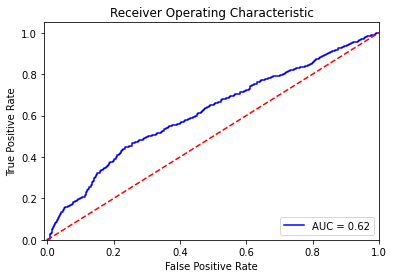

In [ ]:
show_roc2(model_tf1, istf=True, X_test=XTest)

# Comparaciones

In [88]:
ATL_pred = XTest[['location_x', 'location_y', 'points']]
ATL_pred['prediccion'] = predicciones_knn
ATL_pred

,location_x,location_y,points,prediccion
2549,58,477,3,0
3476,241,278,2,0
4559,863,261,2,0
2694,293,171,3,0
3006,279,113,3,0
...,...,...,...,...
500,696,423,3,0
726,655,339,3,0
4688,866,480,3,0
1691,684,377,3,0


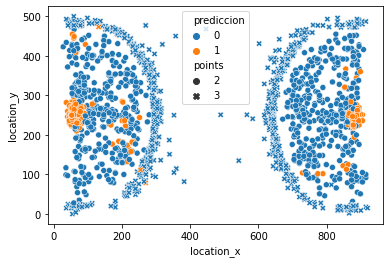

In [89]:
imagen21 = sns.scatterplot(data=ATL_pred, x="location_x", y="location_y", hue="prediccion", style='points')
plt.savefig('imagen21.png', dpi=300)

In [90]:
ATL_real = XTest[['location_x', 'location_y', 'points']]
ATL_real['resultado'] = yTest
ATL_real

,location_x,location_y,points,resultado
2549,58,477,3,0
3476,241,278,2,0
4559,863,261,2,0
2694,293,171,3,1
3006,279,113,3,1
...,...,...,...,...
500,696,423,3,1
726,655,339,3,1
4688,866,480,3,0
1691,684,377,3,1


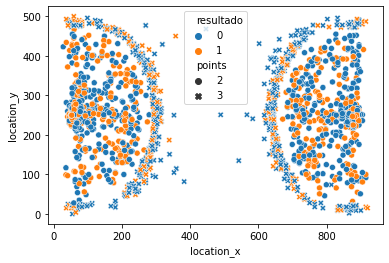

In [91]:
imagen22 = sns.scatterplot(data=ATL_real, x="location_x", y="location_y", hue="resultado", style='points')
plt.savefig('imagen22.png', dpi=300)